In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
username = "muhammadhashir14"
apikey = ""
api_token = {"username":username,"key":apikey}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [73]:
!kaggle competitions download -c playground-series-s3e16

playground-series-s3e16.zip: Skipping, found more recently modified local copy (use --force to force download)


In [74]:
import zipfile
data = zipfile.ZipFile("/kaggle/working/playground-series-s3e16.zip", 'r')
data.extractall("/kaggle/working/")
data.close()

In [75]:
df = pd.read_csv("train.csv")

In [76]:
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [77]:
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [79]:
df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [80]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [81]:
train = df[['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']]

In [82]:
train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [83]:
train['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [84]:
dic = {
    'M': 0,
    'I': 1,
    "F": 2
}

In [85]:
train['Sex'] = train['Sex'].map(dic)

/tmp/ipykernel_28/2057569203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train['Sex'].map(dic)


In [86]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,2,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


In [87]:
train['Sex'] = train['Sex'].astype('float64')

/tmp/ipykernel_28/375338323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train['Sex'].astype('float64')


In [88]:
train.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
dtype: object

In [89]:
label = df['Age']

In [90]:
label = label.astype('float64')

In [91]:
xtrain, xtest, ytrain, ytest = train_test_split(train , label, test_size = 0.2)

In [92]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(59240, 8)
(59240,)
(14811, 8)
(14811,)


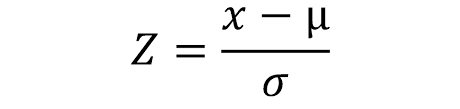

In [93]:
xtrain = np.array(xtrain)
xtest = np.array(xtest) 
len(xtrain[0])

8

In [94]:
def normalization(sample):
    sample_mean = sample.mean(axis = 0)
    sample_mean = sample - sample_mean
    sample_std = sample.std(axis = 0)
    result = sample_mean / sample_std
    return result

In [95]:
xtrain = normalization(xtrain)
xtest = normalization(xtest)

In [96]:
xtrain = np.array(xtrain[:2000])
ytrain = np.array(ytrain[:2000])
xtest = np.array(xtest[2000:2500])
ytest = np.array(ytest[2000:2500])

In [97]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(2000, 8)
(2000,)
(500, 8)
(500,)


In [30]:
def buildmodel():
    model = models.Sequential()

    model.add(layers.Dense(64, activation = 'relu', input_shape = (xtrain.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

In [31]:
%%time
k=4
num_val_samples = len(xtrain) // k
num_epochs = 175

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = xtrain[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = ytrain[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [xtrain[:i * num_val_samples],
         xtrain[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [ytrain[:i * num_val_samples],
         ytrain[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = buildmodel()
    history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
CPU times: user 50min 32s, sys: 3min 29s, total: 54min 1s
Wall time: 48min 35s


In [32]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [33]:
len(average_mae_history)

175

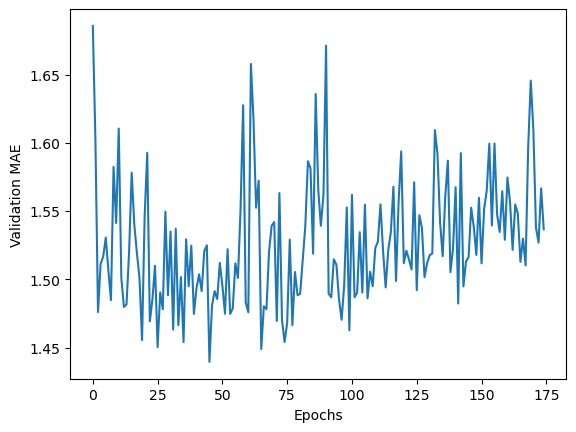

In [34]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

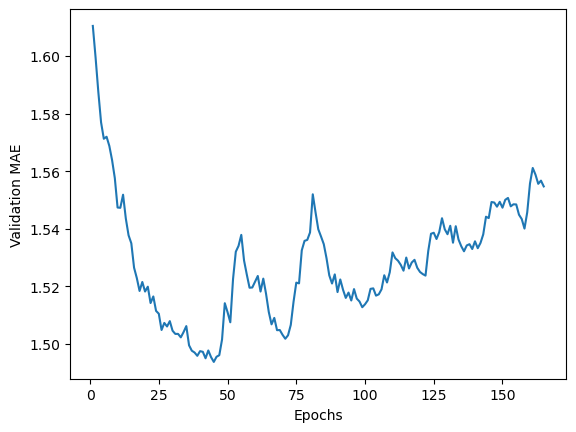

In [35]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [37]:
model = buildmodel()
model.fit(xtrain, ytrain,
          epochs=46, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(xtest, ytest)

16/16 [==============================] - 0s 2ms/step - loss: 4.2672 - mae: 1.4614


In [98]:
predictions = model.predict(xtest)

16/16 [==============================] - 0s 2ms/step


In [115]:
pred = model.predict(xtest)[:500]
print(np.mean(ytest) - np.mean(pred))

16/16 [==============================] - 0s 2ms/step
0.15102188873290956
